* Set objective function to glucose minimization
* Set upper bounds for biomass: 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 (0.30 is max Rhodotorula growth rate in lab)
* Find PPP enzymes fluxes: 'TALA'=Transaldolase, 'TKT1'=Transketolase, 'TKT2'=Transketolase, 'RPI'=Ribose-5-phosphate isomerase (RKI - vist), 'G6PDH2rp'=Glucose 6-phosphate dehydrogenase (ZWF), 'GND'=Phosphogluconate dehydrogenase (GND), 'PGLp'=6-phosphogluconolactonase
* And find ATPM & ACITL fluxes


In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt


In [2]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# Changing the objective function
model.objective = "BIOMASS_RT" 
# Change glucose bounds
model.reactions.get_by_id("EX_glc__D_e").upper_bound = 9999
model.reactions.get_by_id("EX_glc__D_e").lower_bound = -9999


solution = model.optimize('maximize') # minimize the objective function
solution.objective_value # get the objective value i.e flux of the objective function
# print(model.objective.expression)
# print(model.objective.direction)
# solution
# solution.fluxes.BIOMASS_RT or solution.objective_value to get biomass growth rate


756.5768120653916

In [4]:
# Get all fluxes
all_fluxes = solution.fluxes.to_frame(name='Flux') # solution.fluxes gives fluxes for all reactions, to_frame makes it a pandas dataframe
all_fluxes

,Flux
ALCD25yi,0.000000e+00
MTHFCm,0.000000e+00
AMPN,0.000000e+00
DAGCPTer_RT,0.000000e+00
PYRt2,0.000000e+00
...,...
FOLt,0.000000e+00
NADtm,-1.847411e-12
EX_pydxn_e,0.000000e+00
PYDXNtr,0.000000e+00


In [5]:
# Get all fluxes on different GR
glucose_uptakes= np.array([-0.476, -1.114, -1.648, -2.305, -2.6619851, -3.1])
flux_values_specific_glc_uptake = pd.DataFrame(columns=['Glucose uptake', *all_fluxes.index], index=range(len(glucose_uptakes))) #flux_values.index gives the row names column, * extracts the list of strings
biomass_GR = []

for i in range(len(glucose_uptakes)):
    model.reactions.EX_glc__D_e.bounds = glucose_uptakes[i], glucose_uptakes[i]
    solution = model.optimize('maximize')
    flux_values_specific_glc_uptake.loc[i] = solution.fluxes[['EX_glc__D_e', *all_fluxes.index]].values
    biomass_GR += [solution.objective_value]
flux_values_specific_glc_uptake.insert(0, 'Biomass growth rate', biomass_GR, True)

# Example for finding a certain reaction flux: flux_values_specific_GR['EX_o2_e']
flux_values_specific_glc_uptake

,Biomass growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,EX_2hxmp_e,SALCNHe,EX_btn_e,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2
0,0.033713,-0.476,0.0,0.0,0.0,0.0,0.0,0.0,-0.003255,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081992,-1.114,0.0,0.0,0.0,0.0,0.0,0.0,-0.007917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.122398,-1.648,0.0,0.0,0.0,0.0,0.0,0.0,-0.011818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.172112,-2.305,0.0,0.0,0.0,0.0,0.0,0.0,-0.016619,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.199124,-2.661985,0.0,0.0,0.0,0.0,0.0,0.0,-0.019227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.232267,-3.1,0.0,0.0,0.0,0.0,0.0,0.0,-0.022427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# # Get all flux values separately for dif growth rates, make them to a csv file
# flux_values_specific_GR_005.to_csv('flux_values_specific_GR_005.csv', index=True)
# flux_values_specific_GR_010.to_csv('flux_values_specific_GR_010.csv', index=True)
# flux_values_specific_GR_015.to_csv('flux_values_specific_GR_015.csv', index=True)
# flux_values_specific_GR_020.to_csv('flux_values_specific_GR_020.csv', index=True)
# flux_values_specific_GR_025.to_csv('flux_values_specific_GR_025.csv', index=True)
# flux_values_specific_GR_030.to_csv('flux_values_specific_GR_030.csv', index=True)



In [7]:
# Export DataFrames to excel - NB! Will overwrite the pages
# with pd.ExcelWriter("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\all_sim_fluxes_glc_min.xlsx") as excel_writer:
#     flux_values_specific_GR.to_excel(excel_writer, sheet_name='Sheet1', index=False)


In [8]:
def fluxes_on_specific_glc_uptake(model, glucose_uptakes, enzymes, minimize = False):
    fluxes = pd.DataFrame(columns=[*enzymes], index=range(len(glucose_uptakes)))
    for i in range(len(glucose_uptakes)):
        model.reactions.EX_glc__D_e.bounds = glucose_uptakes[i], glucose_uptakes[i]
        solution = model.optimize('minimize' if minimize else 'maximize')        
        fluxes.loc[i] = solution.fluxes[[*enzymes]].values
        flux_values_specific_glc_uptake.insert(0, 'Biomass growth rate', biomass_GR, True)

    return fluxes

In [14]:
# Fluxes for ATPM and ACITL on specific glc uptake
enzymes = ['EX_glc__D_e', 'ATPtm' , 'ACS', 'ACITL', 'ATPM'] # ACS - Acetyl-CoA synthetase, ACITL - ATP-Citrate lyase, ATPM - ATP maintenance requirement
ATPM_ACITL_fluxes = fluxes_on_specific_glc_uptake(model, glucose_uptakes, enzymes)
ATPM_ACITL_fluxes

,EX_glc__D_e,ATPtm,ACS,ACITL,ATPM
0,-0.476,6.662326,0.184421,0.0,1.22
1,-1.114,14.418924,0.448523,0.0,1.22
2,-1.648,20.92347,0.669559,0.0,1.22
3,-2.305,28.926255,0.941508,0.0,1.22
4,-2.661985,33.274618,1.089273,0.0,1.22
5,-3.1,38.609989,1.270579,0.0,1.22


In [10]:
# Get fluxes for PPP enzymes on specific glc uptake
# add phosphoketolase 'XPK', pyruvate decarboxylase 'PYRDC', pyruvate dehydrogenase 'PDHm'

enzymes = ['G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'] # Jätan välja 'PGLp'ja 'GND' (Chen23 PP tabelis oli G6PDH2r + PGLp, GND+RPI, TKT1, TKT2 ja TALA), aga 'RPE', 'FPK'??
PPP_enzymes_fluxes = abs(fluxes_on_specific_glc_uptake(model, glucose_uptakes, enzymes))

# Change G6PDH2rp column name to oxpp 
PPP_enzymes_fluxes = PPP_enzymes_fluxes.rename(columns = {'G6PDH2r': 'oxpp'})
PPP_enzymes_fluxes
PPP_enzymes_fluxes

,oxpp,TKT1,TALA,TKT2,XPK,PYRDC,PDHm
0,0.0,0.076355,0.076355,0.082665,0.181042,0.015572,0.427713
1,0.0,0.1857,0.1857,0.201046,0.440304,0.077178,0.950726
2,0.0,0.277214,0.277214,0.300124,0.65729,0.120209,1.384278
3,0.0,0.389808,0.389808,0.422022,0.924256,0.173151,1.917693
4,0.0,0.450987,0.450987,0.488257,1.069314,0.201917,2.207528
5,0.0,0.526052,0.526052,0.569525,1.247297,0.237213,2.56315


In [11]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis

# Sample data
x = biomass_GR
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
y2 = PPP_enzymes_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm']]

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM', 'ACITL'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

KeyError: "['ATPM'] not in index"

In [ ]:
def fluxes_on_specific_GR(model, GR_range, enzymes, minimize = False):
    fluxes = pd.DataFrame(columns=['GR', *enzymes], index=range(len(GR_range)))
    for i in range(len(GR_range)):
        model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
        solution = model.optimize('minimize' if minimize else 'maximize')        
        fluxes.loc[i] = solution.fluxes[['BIOMASS_RT', *enzymes]].values
    return fluxes

In [ ]:
# Fluxes for ATPM and ACITL
GR_range= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
enzymes = ['ATPM', 'ACITL', 'EX_glc__D_e']
ATPM_ACITL_fluxes = fluxes_on_specific_GR(model, GR_range, enzymes)
ATPM_ACITL_fluxes


,GR,ATPM,ACITL,EX_glc__D_e
0,0.05,1.22,0.0,-9999.0
1,0.1,1.22,0.0,-9999.0
2,0.15,1.22,0.0,-9999.0
3,0.2,1.22,0.0,-9999.0
4,0.25,1.22,0.0,-9999.0
5,0.3,1.22,0.0,-9999.0


In [ ]:
# plt.plot(GR_range, np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']]), 'o', label=['ATPM', 'ACITL'])
# plt.xlabel('Biomass growth rate')
# plt.ylabel('Flux')
# plt.title("Biomass growth rate vs ATPM & ACITL fluxes")
# plt.legend(fontsize=6, loc='upper left')
# plt.show()

In [ ]:
# Get fluxes for PPP enzymes
# add phosphoketolase 'XPK', pyruvate decarboxylase 'PYRDC', pyruvate dehydrogenase 'PDHm'

GR_range= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
enzymes = ['G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'] # Jätan välja 'PGLp'ja 'GND' (Chen23 PP tabelis oli G6PDH2r + PGLp, GND+RPI, TKT1, TKT2 ja TALA), aga 'RPE', 'FPK'??
PPP_enzymes_fluxes = abs(fluxes_on_specific_GR(model, GR_range, enzymes))
PPP_enzymes_fluxes


,GR,G6PDH2r,TKT1,TALA,TKT2,XPK,PYRDC,PDHm
0,0.05,0.0,2499.670242,2499.670242,2499.6796,4999.349842,2499.671023,4999.683534
1,0.1,0.0,2499.590484,2499.590484,2499.609201,4999.199685,2499.592047,4999.867069
2,0.15,0.0,2499.510726,2499.510726,2499.538801,4999.049527,2499.51307,5000.050603
3,0.2,0.0,2499.430968,2499.430968,2499.468402,4998.89937,2499.434093,5000.234137
4,0.25,0.0,2499.35121,2499.35121,2499.398002,4998.749212,2499.355117,5000.417671
5,0.3,0.0,2499.271452,2499.271452,2499.327603,4998.599055,2499.27614,5000.601206


In [ ]:
# Change G6PDH2rp column name to oxpp 
PPP_enzymes_fluxes = PPP_enzymes_fluxes.rename(columns = {'G6PDH2r': 'oxpp'})
PPP_enzymes_fluxes


,GR,oxpp,TKT1,TALA,TKT2,XPK,PYRDC,PDHm
0,0.05,0.0,2499.670242,2499.670242,2499.6796,4999.349842,2499.671023,4999.683534
1,0.1,0.0,2499.590484,2499.590484,2499.609201,4999.199685,2499.592047,4999.867069
2,0.15,0.0,2499.510726,2499.510726,2499.538801,4999.049527,2499.51307,5000.050603
3,0.2,0.0,2499.430968,2499.430968,2499.468402,4998.89937,2499.434093,5000.234137
4,0.25,0.0,2499.35121,2499.35121,2499.398002,4998.749212,2499.355117,5000.417671
5,0.3,0.0,2499.271452,2499.271452,2499.327603,4998.599055,2499.27614,5000.601206


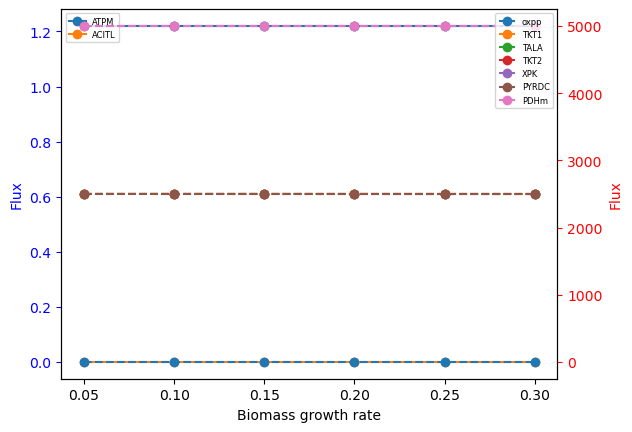

In [ ]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
y2 = PPP_enzymes_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm']]

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM', 'ACITL'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

## To make sperate plots
# plt.plot(GR_range, np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']]), 'o', label=['ATPM', 'ACITL'])
# plt.xlabel('Biomass growth rate')
# plt.ylabel('Flux')
# plt.title("Biomass growth rate vs ATPM & ACITL fluxes")
# plt.legend(fontsize=6, loc='upper left')
# plt.show()

# plt.plot(PPP_enzymes_fluxes['GR'], PPP_enzymes_fluxes[['oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']], 'o', label=['oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm'])
# plt.xlabel('Biomass growth rate')
# plt.ylabel('Flux')
# plt.title("Biomass growth rate vs PPP enzymes' fluxes")
# plt.legend(fontsize=6, loc='upper left')
# plt.show()

# exchange_fluxes_all = model.summary().to_frame()
# exchange_fluxes_all = exchange_fluxes_all[abs(exchange_fluxes_all['flux']) != 0.01]
# exchange_fluxes_all = exchange_fluxes_all[['metabolite', 'flux']]
# # exchange_fluxes_all

In [ ]:
# # Export DataFrames to excel - NB! Will overwrite the pages
# with pd.ExcelWriter("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\PPP_fluxes_glc_min.xlsx") as excel_writer:
#     PPP_enzymes_fluxes.to_excel(excel_writer, sheet_name='Sheet1', index=False)
#     ATPM_ACITL_fluxes.to_excel(excel_writer, sheet_name='Sheet2', index=False)


In [ ]:
# from pathlib import Path
# from cobra.io import load_json_model, save_json_model, load_matlab_model, save_matlab_model, read_sbml_model, write_sbml_model
# import logging
# for i in range(len(GR_range)):
#     model.reactions.BIOMASS_RT.bounds = GR_range[i], GR_range[i]
#     save_json_model(model, f"C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\edited_Rt_IFO0880_model_{GR_range[i]}.json")